In [2]:
from openai import OpenAI
import base64

#  编码函数： 将本地文件转换为 Base64 编码的字符串
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

# 将xxxx/eagle.png替换为你本地图像的绝对路径
base64_image = encode_image("E:\\AI学习\\Week10\\Week10_xx\\屏幕截图 2025-11-06 000333.png")

client = OpenAI(
    # 若没有配置环境变量，请用阿里云百炼API Key将下行替换为：api_key="sk-xxx",
    # 新加坡和北京地域的API Key不同。获取API Key：https://help.aliyun.com/zh/model-studio/get-api-key
    api_key='sk-xxx',
    # 以下是北京地域base_url，如果使用新加坡地域的模型，需要将base_url替换为：https://dashscope-intl.aliyuncs.com/compatible-mode/v1
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)


completion = client.chat.completions.create(
    model="qwen3-vl-plus", # 此处以qwen3-vl-plus为例，可按需更换模型名称。模型列表：https://help.aliyun.com/zh/model-studio/models
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image_url",
                    # 需要注意，传入Base64，图像格式（即image/{format}）需要与支持的图片列表中的Content Type保持一致。"f"是字符串格式化的方法。
                    # PNG图像：  f"data:image/png;base64,{base64_image}"
                    # JPEG图像： f"data:image/jpeg;base64,{base64_image}"
                    # WEBP图像： f"data:image/webp;base64,{base64_image}"
                    "image_url": {"url": f"data:image/png;base64,{base64_image}"},
                },
                {"type": "text", "text": "图中描绘的是狗还是猫?"},
            ],
        },
    ],
)
print(completion.choices[0].message.content)

图中描绘的是一只**狗**。

可以从以下几个特征判断：

- **面部结构**：它有明显的犬类口鼻部，嘴巴张开露出牙齿和舌头，符合狗的典型表情（如吠叫、兴奋或喘气）。
- **耳朵和毛发**：耳朵下垂，毛发蓬松，尤其是颈部白色长毛，是许多犬种（如柯基、边境牧羊犬混种等）的特征。
- **项圈**：佩戴红色项圈，这是宠物狗常见的配饰。
- **眼神和姿态**：抬头仰望，显得专注或期待，这种行为在狗中非常常见（比如等待主人指令或食物）。

没有猫的典型特征（如尖耳、胡须分布、瞳孔形状、身体比例等），因此可以明确判断是**狗**。


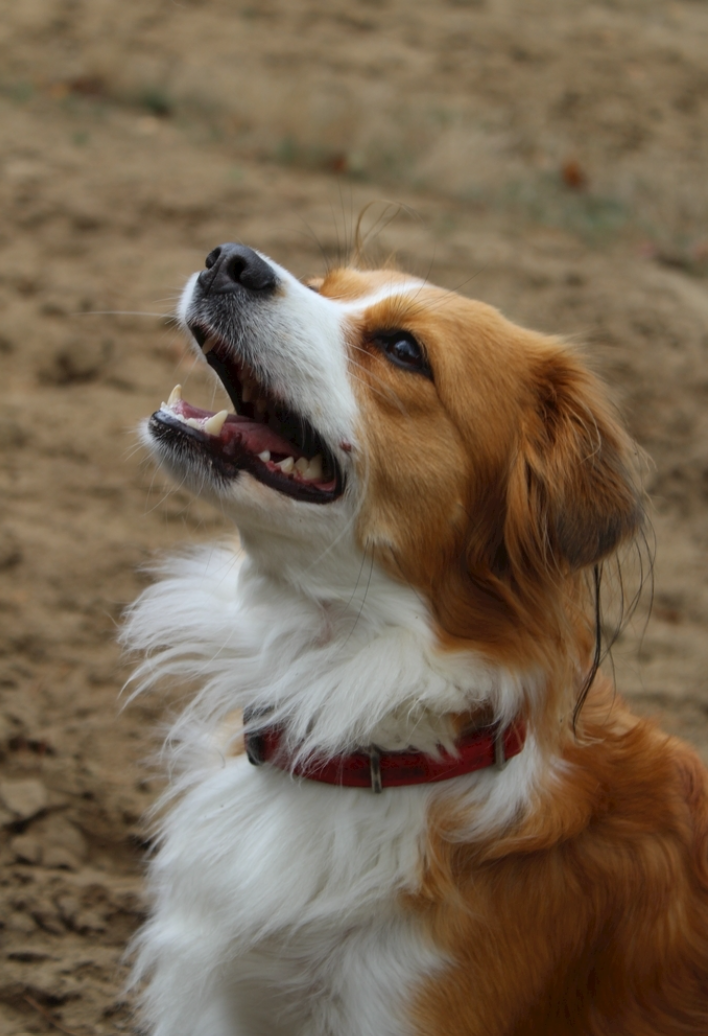

In [3]:
from PIL import Image
Image.open("E:\\AI学习\\Week10\\Week10_xx\\屏幕截图 2025-11-06 000333.png")